<a href="https://colab.research.google.com/github/IvanDaniarAP/thesis/blob/main/perdiksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error: 606.3847876376794
Predicted Bitcoin Price on 2024-10-03: 64569.7978125


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


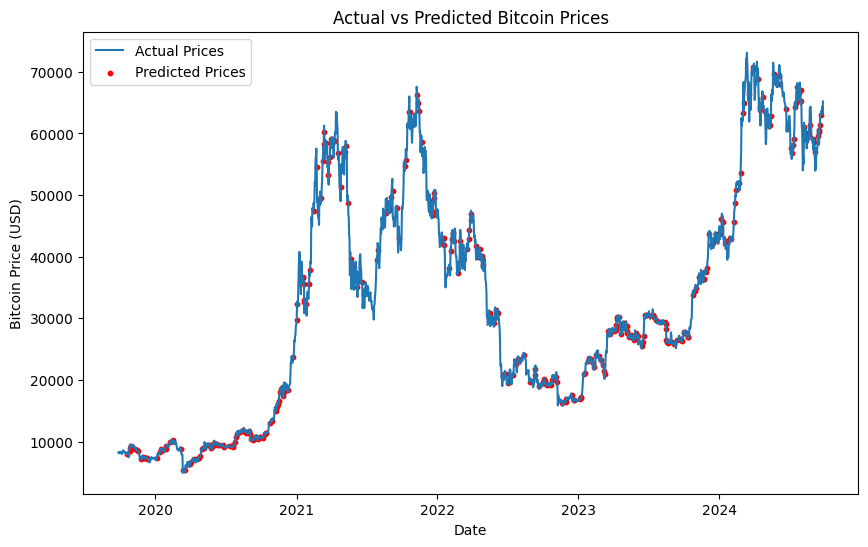

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/BTC-USD_data_5years_daily.csv'
btc_data = pd.read_csv(file_path)

# Convert the Date column to datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Sort the data by Date (just in case)
btc_data = btc_data.sort_values('Date')

# Feature selection: We'll use the 'Date' as a time-based feature, and the target will be the 'Close' price.
btc_data['Days'] = (btc_data['Date'] - btc_data['Date'].min()).dt.days

# Prepare features and target
X = btc_data[['Days']]  # The number of days since the first date in the dataset
y = btc_data['Close']  # Predicting the 'Close' price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set and calculate the error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Function to predict future Bitcoin prices
def predict_btc_price(input_date_str):
    input_date = datetime.strptime(input_date_str, "%Y-%m-%d")
    days_since_start = (input_date - btc_data['Date'].min()).days
    prediction = model.predict(np.array([[days_since_start]]))
    return prediction[0]

# Example usage of the prediction function
future_date = '2024-10-03'
predicted_price = predict_btc_price(future_date)
print(f"Predicted Bitcoin Price on {future_date}: {predicted_price}")

# Plot the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.plot(btc_data['Date'], btc_data['Close'], label='Actual Prices')
plt.scatter(X_test['Days'].apply(lambda x: btc_data['Date'].min() + pd.Timedelta(days=x)),
            y_pred, color='red', label='Predicted Prices', s=10)
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()


In [5]:
import numpy as np

# Example of a dataset (you should replace it with your actual dataset)
data = np.random.rand(100, 1)  # 100 data points with 1 feature

# Define time_step based on your dataset (e.g., 60 time steps)
time_step = 60

# Prepare your data (example: converting it into sequences for the LSTM)
X = []
y = []

for i in range(time_step, len(data)):
    X.append(data[i-time_step:i, 0])
    y.append(data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape the data for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from datetime import timedelta

In [9]:
import pandas as pd

# Load the data from a CSV file
btc_data = pd.read_csv('/content/BTC-USD_data_5years_daily.csv')

# Assuming the CSV contains 'Date' and 'Close' columns
btc_data['Date'] = pd.to_datetime(btc_data['Date'])  # Ensure the 'Date' column is in datetime format

# Now proceed with the rest of the code
btc_data = btc_data[['Date', 'Close']].copy()

# Preprocess the data (scaling it)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(btc_data['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Define time_step (the length of the sequences to feed into LSTM)
time_step = 60

# Create training sequences
X_train, y_train = [], []
for i in range(time_step, len(train_data)):
    X_train.append(train_data[i-time_step:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create test sequences
X_test, y_test = [], []
for i in range(time_step, len(test_data)):
    X_test.append(test_data[i-time_step:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape input to be [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Predict the closing price using the trained model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the scaled data back to original values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0504 - val_loss: 0.0062
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0027 - val_loss: 0.0039
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.00

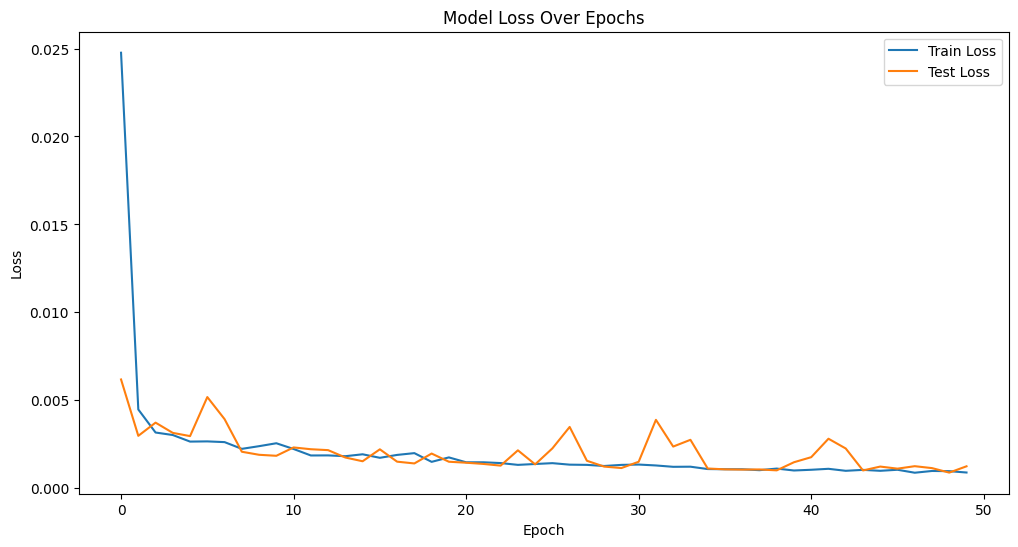

In [11]:
# Plot the training and testing loss over epochs
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [12]:
# Function to predict future prices
def predict_future_days(last_sequence, days_to_predict):
    predictions = []
    current_sequence = last_sequence

    for day in range(days_to_predict):
        pred = model.predict(current_sequence.reshape(1, time_step, 1))
        predictions.append(pred[0][0])

        # Update the sequence for the next day
        current_sequence = np.append(current_sequence[1:], pred)
        current_sequence = current_sequence.reshape(time_step, 1)

    return predictions

# Get the last 'time_step' sequence from the test dataset
last_sequence = test_data[-time_step:]

# Ask the user for input on how many days to predict in the future
days_to_predict = int(input("Enter the number of future days you want to predict: "))

# Predict future Bitcoin prices
future_predictions = predict_future_days(last_sequence, days_to_predict)

# Inverse transform the predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates for plotting
last_date = btc_data['Date'].max()
future_dates = [last_date + timedelta(days=i+1) for i in range(days_to_predict)]

Enter the number of future days you want to predict: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


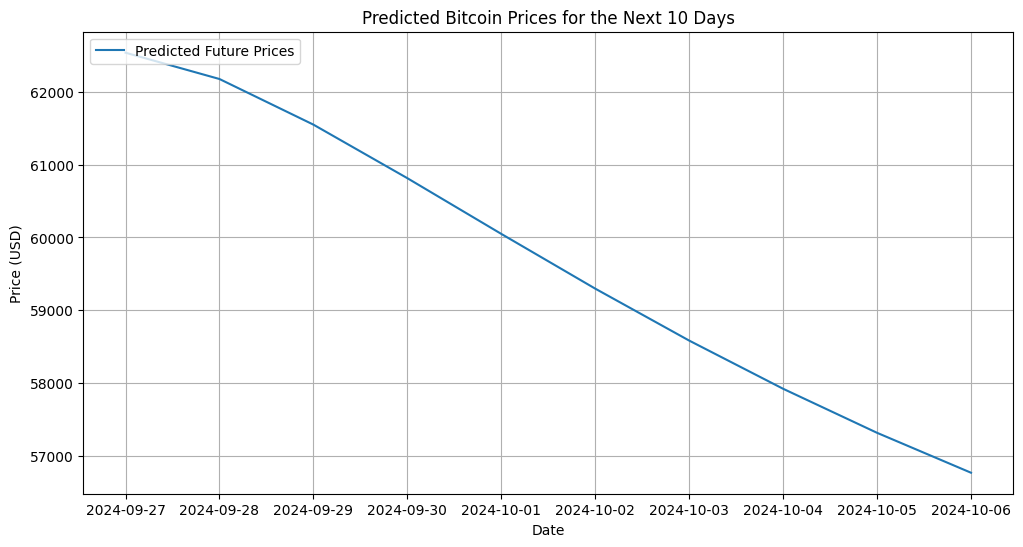

In [13]:
# Plot the predicted future prices
plt.figure(figsize=(12,6))
plt.plot(future_dates, future_predictions, label='Predicted Future Prices')
plt.title(f'Predicted Bitcoin Prices for the Next {days_to_predict} Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [14]:
# Display the future predicted prices with corresponding dates
for i, price in enumerate(future_predictions):
    print(f"Predicted price on {future_dates[i].strftime('%Y-%m-%d')}: ${price[0]:.2f}")

Predicted price on 2024-09-27: $62538.41
Predicted price on 2024-09-28: $62177.00
Predicted price on 2024-09-29: $61549.95
Predicted price on 2024-09-30: $60813.96
Predicted price on 2024-10-01: $60048.10
Predicted price on 2024-10-02: $59295.88
Predicted price on 2024-10-03: $58581.95
Predicted price on 2024-10-04: $57919.61
Predicted price on 2024-10-05: $57314.27
Predicted price on 2024-10-06: $56765.80
